In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files #colab specific library to load files
uploaded = files.upload() # Upload File; Here we will upload parkinson's data
# Note: Load both train_data and test_data csv files

#Confirm Upload
for fn in uploaded.keys():
  print('You uploaded file "{name}" with length {length} bytes'.format(name=fn,length = len(uploaded[fn])))

Saving winequality-white.csv to winequality-white.csv
You uploaded file "winequality-white.csv" with length 264426 bytes


In [ ]:
#display header and a few rows
df = pd.read_csv('Data_Cortex_Nuclear.csv')
display(df)

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,...,TIAM1_N,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,0.687906,0.306382,0.402698,0.296927,1.022060,0.605673,1.877684,2.308745,0.441599,0.859366,0.416289,0.369608,0.178944,1.866358,3.685247,1.537227,0.264526,0.319677,0.813866,0.165846,0.453910,3.037621,0.369510,0.458539,0.335336,0.825192,0.576916,0.448099,0.586271,...,0.482864,0.294170,0.182150,0.842725,0.192608,1.443091,0.294700,0.354605,1.339070,0.170119,0.159102,0.188852,0.106305,0.144989,0.176668,0.125190,0.115291,0.228043,0.142756,0.430957,0.247538,1.603310,2.014875,0.108234,1.044979,0.831557,0.188852,0.122652,NaN,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,0.695006,0.299051,0.385987,0.281319,0.956676,0.587559,1.725774,2.043037,0.445222,0.834659,0.400364,0.356178,0.173680,1.761047,3.485287,1.509249,0.255727,0.304419,0.780504,0.157194,0.430940,2.921882,0.342279,0.423560,0.324835,0.761718,0.545097,0.420876,0.545097,...,0.454519,0.276431,0.182086,0.847615,0.194815,1.439460,0.294060,0.354548,1.306323,0.171427,0.158129,0.184570,0.106592,0.150471,0.178309,0.134275,0.118235,0.238073,0.142037,0.457156,0.257632,1.671738,2.004605,0.109749,1.009883,0.849270,0.200404,0.116682,NaN,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,0.677348,0.291276,0.381002,0.281710,1.003635,0.602449,1.731873,2.017984,0.467668,0.814329,0.399847,0.368089,0.173905,1.765544,3.571456,1.501244,0.259614,0.311747,0.785154,0.160895,0.423187,2.944136,0.343696,0.425005,0.324852,0.757031,0.543620,0.404630,0.552994,...,0.447197,0.256648,0.184388,0.856166,0.200737,1.524364,0.301881,0.386087,1.279600,0.185456,0.148696,0.190532,0.108303,0.145330,0.176213,0.132560,0.117760,0.244817,0.142445,0.510472,0.255343,1.663550,2.016831,0.108196,0.996848,0.846709,0.193685,0.118508,NaN,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,0.583277,0.296729,0.377087,0.313832,0.875390,0.520293,1.566852,2.132754,0.477671,0.727705,0.385639,0.362970,0.179449,1.286277,2.970137,1.419710,0.259536,0.279218,0.734492,0.162210,0.410615,2.500204,0.344509,0.429211,0.330121,0.746980,0.546763,0.386860,0.547849,...,0.442650,0.398534,0.161768,0.760234,0.184169,1.612382,0.296382,0.290680,1.198765,0.159799,0.166112,0.185323,0.103184,0.140656,0.163804,0.123210,0.117439,0.234947,0.145068,0.430996,0.251103,1.484624,1.957233,0.119883,0.990225,0.833277,0.192112,0.132781,NaN,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,0.550960,0.286961,0.363502,0.277964,0.864912,0.507990,1.480059,2.013697,0.483416,0.687794,0.367531,0.355311,0.174836,1.324695,2.896334,1.359876,0.250705,0.273667,0.702699,0.154827,0.398550,2.456560,0.329126,0.408755,0.313415,0.691956,0.536860,0.360816,0.512824,...,0.419095,0.393447,0.160200,0.768113,0.185718,1.645807,0.296829,0.309345,1.206995,0.164650,0.160687,0.188221,0.104784,0.141983,0.167710,0.136838,0.116048,0.255528,0.140871,0.48

In [ ]:
df.describe()

In [ ]:
#Evaluating the number of unique, 0 and NaN entries in the data frame
for col in df.columns.values:
  list_vals = pd.unique(df[col]) # Returning the unique values of the column in the form of a list
  print(col + ' is of type ' + str(df[col].dtypes) + ' and has, ' + str(len(list_vals)) + ' unique values and ' + str(df[col].isna().sum()) + ' null entries ' + 'and, also ' + str(df[col].isna().sum()) + ' NA values')
  if(len(list_vals) < 10): # Printing the unique values if their number is less than 10
    list_str=''
    for n_value in range(0,len(list_vals)):
      list_str = list_str + str(list_vals[n_value]) + ', '
    print(' These are : ' + list_str[0:len(list_str)-2])


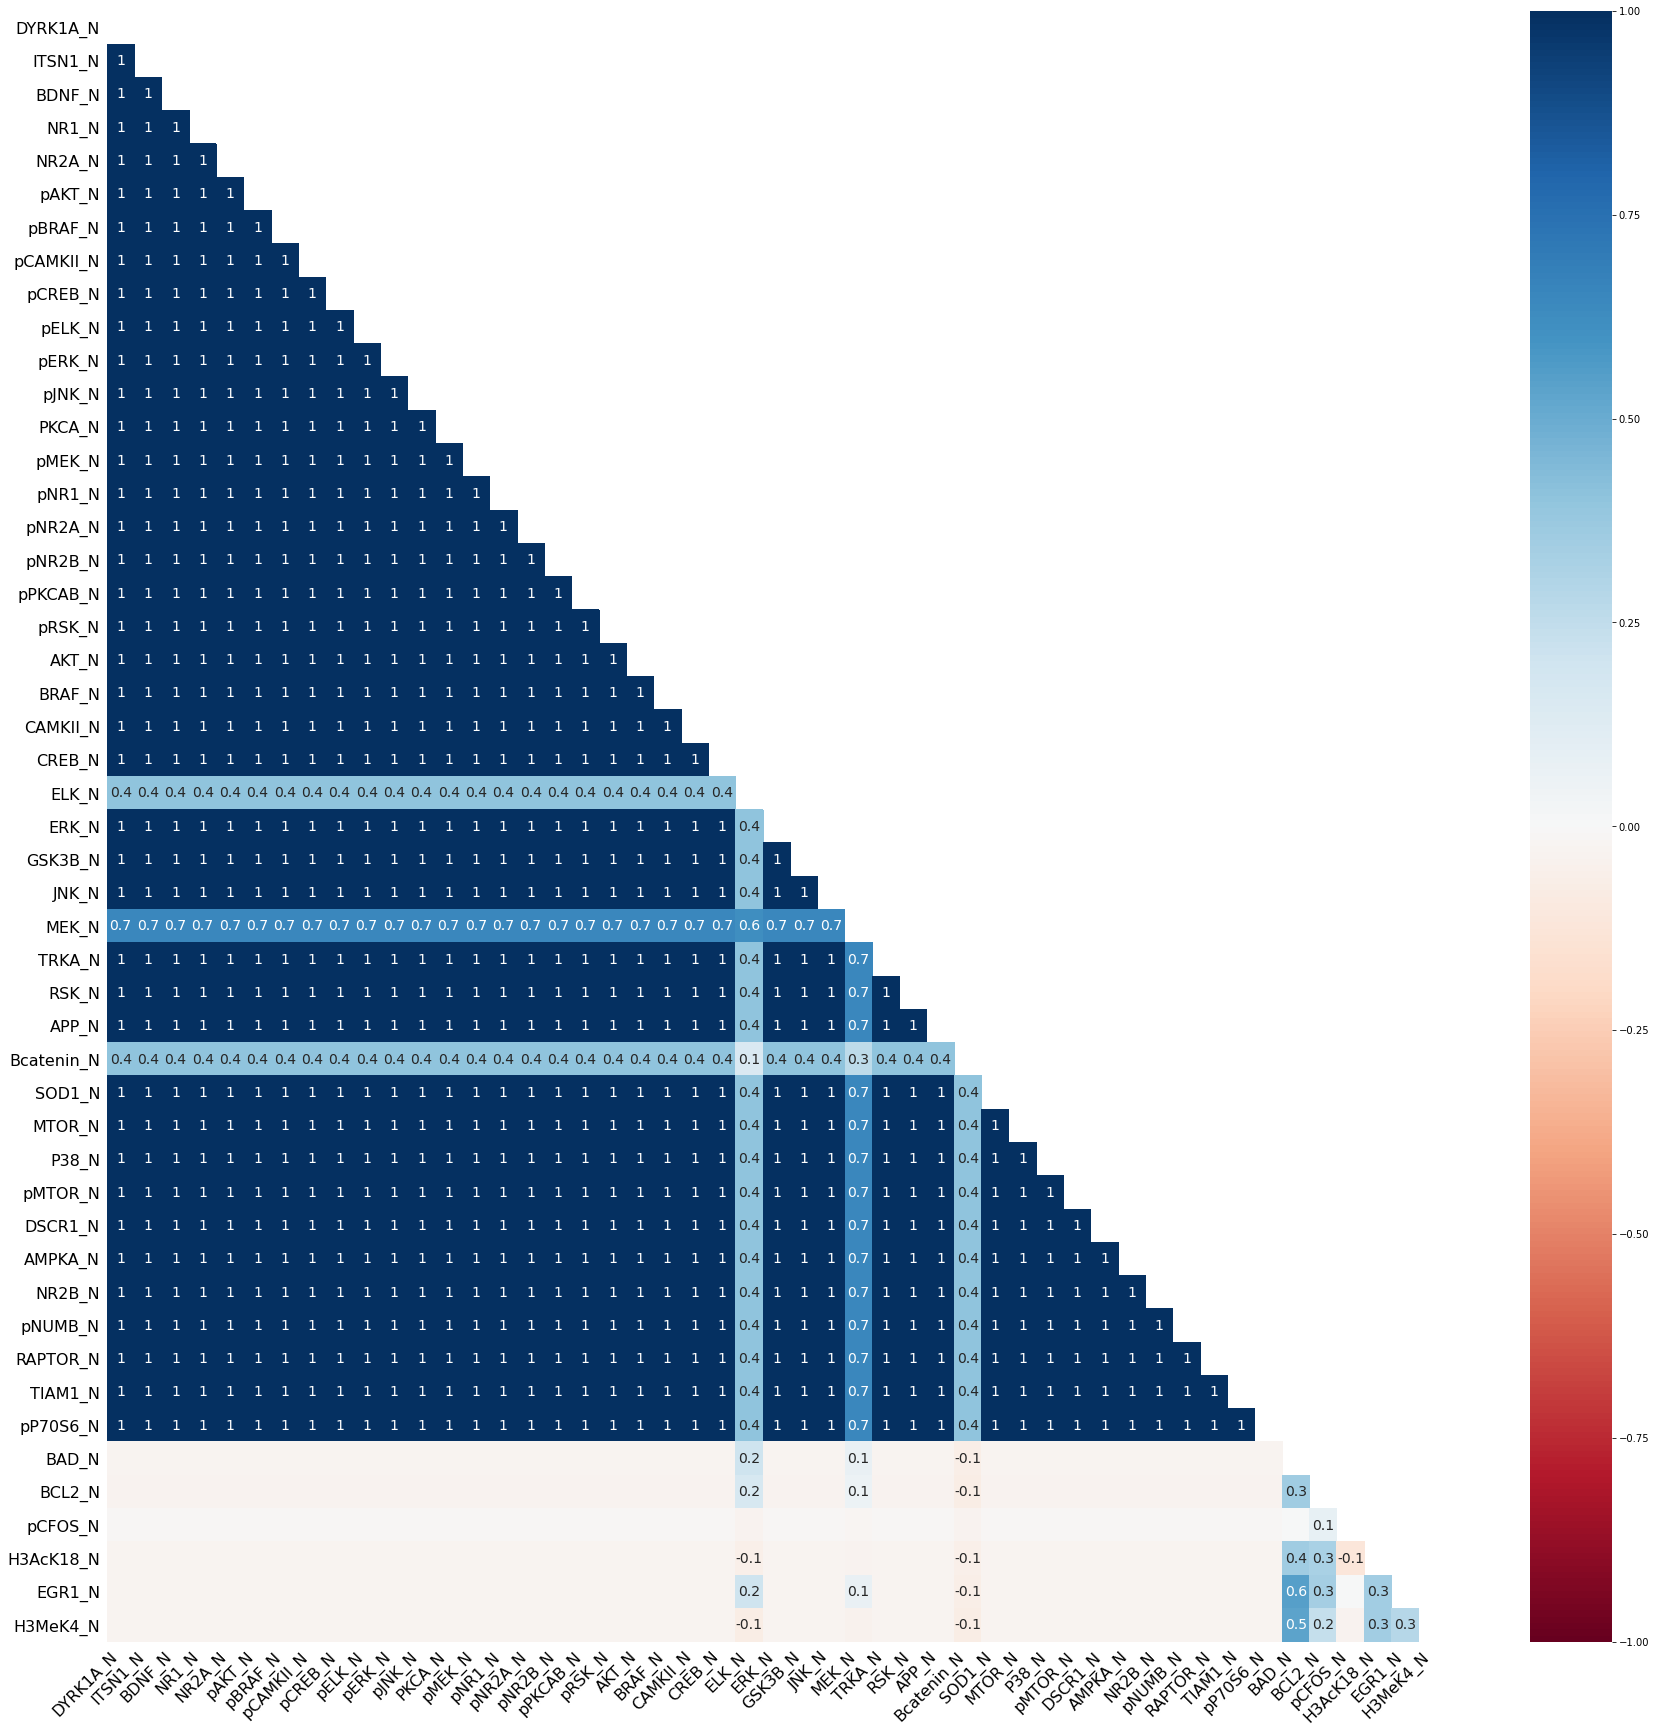

In [ ]:
import missingno as msno
import matplotlib.pyplot as plt
msno.heatmap(df,figsize=(30,30))

Observations:

1. From the above heatmap, we can clearly observe that there are a significant no. of columns with missing values.



# Preparation of Data for Training and Validation

In [ ]:
# Here, we impute the columns that have missing values with the mean of the remaining values of that particular column 
for col in df.columns.values:
  if df[col].isna().sum()!= 0:
    df[col].fillna(df[col].mean(), inplace = True)

**Prediction of the genotype for a given sample input**

In [ ]:
# Conversion of genotype attribute into a binary(int) number and adding a new column to our dataframe for training the algorithms
df['encoded_genotype'] = np.where(df['Genotype'].str.contains('Control'), 1, 0)

In [ ]:
# Separation of the columns into input and output parameters
X = df.drop(['MouseID','Genotype','Treatment','Behavior','class','encoded_genotype'],axis=1)
y = df.encoded_genotype

**Imputation of variables using multivariate imputation**

In [ ]:
X.corr()

In [ ]:
# from sklearn.experimental import enable_iterative_imputer
# from sklearn.impute import IterativeImputer
# from sklearn.linear_model import LinearRegression

# lr = LinearRegression() #Estimator used for Iterative Imputer
# imp = IterativeImputer(estimator = lr, max_iter=50, random_state=0, tol = 0.001)
# imp.fit_transform(X)


**Observation:**

1.  Unable to use the Iterative Imputer as early stopping criteria is not met for tolerance 0.001.
2. Also, it does converge for a larger tolerance value but in our case, due to smaller values of input variable we can't allow higher error values.




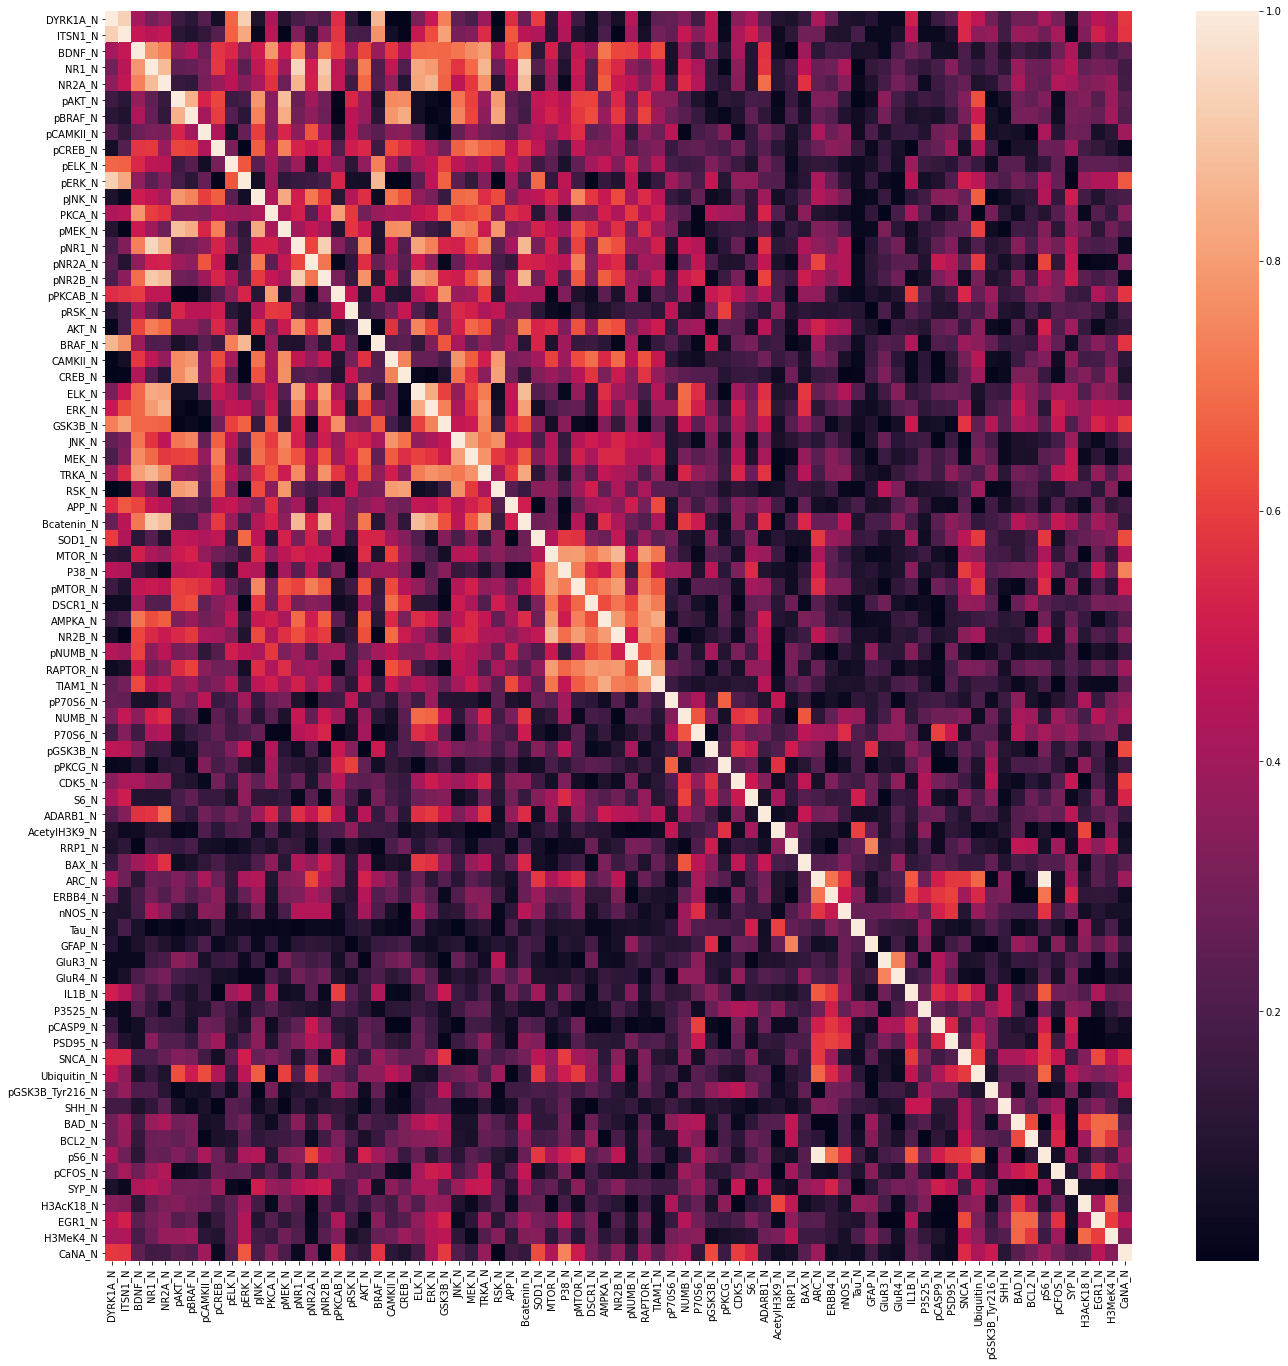

In [ ]:
#Plotting Heat Map for the revamped input X
corrMatrix = X.corr(method = 'spearman')
fig, ax = plt.subplots(figsize=(23,23))
sns.heatmap(abs(corrMatrix),annot =False)
plt.show()

In [ ]:
#Here, we have divided the input dataset into 2 sets for training and testing respectively
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size = 0.6,random_state=2)
print(train_X,train_y)

     DYRK1A_N   ITSN1_N    BDNF_N  ...    EGR1_N  H3MeK4_N    CaNA_N
475  0.331977  0.499110  0.321801  ...  0.183135  0.205440  1.314201
756  0.304788  0.617299  0.335164  ...  0.202171  0.240372  0.795637
672  0.570857  0.717571  0.326418  ...  0.189873  0.275356  1.322394
69   0.346891  0.474287  0.296166  ...  0.183135  0.205440  1.538291
14   0.374410  0.462313  0.344629  ...  0.227937  0.224212  1.613897
..        ...       ...       ...  ...       ...       ...       ...
360  2.480316  2.488684  0.437048  ...  0.136711  0.205440  2.009125
466  0.379772  0.581380  0.335432  ...  0.183135  0.205440  1.089651
299  0.289355  0.439076  0.338731  ...  0.337187  0.205440  1.340517
493  0.251861  0.383569  0.282413  ...  0.289795  0.205440  1.210487
527  0.363178  0.613321  0.405328  ...  0.185431  0.195716  1.255979

[432 rows x 77 columns] 475    1
756    0
672    0
69     1
14     1
      ..
360    1
466    1
299    1
493    1
527    1
Name: encoded_genotype, Length: 432, dtype: int6

In [ ]:
#Normalizing the data so that each column has mean 0 and variance 1
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(train_X)
X_tr = pd.DataFrame(scaler.transform(train_X))
y_tr = pd.DataFrame(train_y)

#Transforming the output using the same scaler fit used for training data
X_ts = pd.DataFrame(scaler.transform(test_X))
y_ts = pd.DataFrame(test_y)

# Training and Testing for various algorithms

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_tr,y_tr)

print('The accuracy of linear regression model on training data is ' + str(reg.score(X_tr,y_tr)))
print('The accuracy of linear regression model on testing data is '+ str(reg.score(X_ts,y_ts)))

The accuracy of linear regression model on training data is 0.8314701203138841
The accuracy of linear regression model on testing data is 0.7516879913385552


In [ ]:
from sklearn import linear_model
hyp_param = [0, 0.26]

for i in hyp_param:

  lasso_reg = linear_model.Lasso(alpha = i, max_iter =10000000, tol=1)
  lasso_reg.fit(X_tr,y_tr)

  # print('The accuracy of linear regression model on training data is ' + str(lasso_reg.score(X_tr,y_tr)) + ' for hyperparameter ' +str(i))
  # print('The accuracy of linear regression model on testing data is '+ str(lasso_reg.score(X_ts,y_ts)) + ' for hyperparameter ' +str(i))
print(lasso_reg.coef_)

[-0.         -0.          0.          0.          0.         -0.
 -0.         -0.         -0.          0.          0.         -0.
  0.         -0.          0.          0.          0.          0.
 -0.          0.          0.          0.         -0.          0.
  0.          0.         -0.         -0.         -0.          0.
 -0.00313917 -0.         -0.          0.          0.          0.
 -0.          0.          0.          0.          0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.          0.         -0.         -0.         -0.          0.
 -0.         -0.         -0.         -0.          0.         -0.
  0.         -0.         -0.         -0.          0.         -0.
 -0.          0.         -0.         -0.          0.          0.
  0.         -0.          0.         -0.         -0.        ]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)


**Observation**

1. As the value of hyper parameter 'alpha' is increased, we notice that the coefficients of certain attributes start turning zero.
2. The last non-zero weight turns to zero when 'alpha' becomes 0.26.
3. This reason for this being that as value of alpha increases the constraint parameter in the error term, starts dominating leading to the weights going to zero.


In [ ]:
from sklearn.linear_model import Ridge
hyp_param = [20, 30]

for i in hyp_param:

  ridge_reg = Ridge(alpha = i, max_iter =10)
  ridge_reg.fit(X_tr,y_tr)

  print('The accuracy of linear regression model on training data is ' + str(ridge_reg.score(X_tr,y_tr)) + ' for hyperparameter ' +str(i))
  print('The accuracy of linear regression model on testing data is '+ str(ridge_reg.score(X_ts,y_ts))+ ' for hyperparameter ' + str(i))

The accuracy of linear regression model on training data is 0.7947225773744949 for hyperparameter 20
The accuracy of linear regression model on testing data is 0.773678801612403 for hyperparameter 20
The accuracy of linear regression model on training data is 0.7836147274542722 for hyperparameter 30
The accuracy of linear regression model on testing data is 0.7691805449385276 for hyperparameter 30


# Cross-Validation for Random Forest Classifier and SVM algorithms

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
mean_accuracy_rfc = cross_validate(rfc,X_ts,y_ts,cv=5,scoring='accuracy')['test_score'].mean()

print('The mean accuracy for the Random Forest Classifier is '+ str(mean_accuracy_rfc))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

The mean accuracy for the Random Forest Classifier is 0.9706738223017293


In [ ]:
from sklearn import svm

svc = svm.SVC()
mean_accuracy_svm =cross_validate(svc,X_ts,y_ts,cv=5,scoring='accuracy')['test_score'].mean()

print('The mean accuracy for SVM algorithm is '+ str(mean_accuracy_svm))

The mean accuracy for SVM algorithm is 0.9706738223017293


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

#Variation of Hyperparameters and estimation of the best hyper-parameter

In [ ]:
print('Training SVC using GridSearchCV')

from sklearn import svm
hyperparameters = {'kernel':('rbf','linear','poly'),'C':(25,35,105), 'degree':[3,5,7]}
#The above hyperparameters would be tried by us

svc = svm.SVC()
clf = GridSearchCV(estimator=svc,param_grid=hyperparameters)
clf.fit(np.array(X_tr),np.squeeze(y_tr))
print('Best Parameters:')
print(clf.best_params_)
print('Best score is '+str(clf.best_score_))

Training SVC using GridSearchCV
Best Parameters:
{'C': 25, 'degree': 3, 'kernel': 'rbf'}
Best score is 0.9861267040898156


In [ ]:
print('Random Forest Classifier')
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
hyperparameters = {'max_depth':[5,10,30,50],'n_estimators':[10,50,100]}
clf = GridSearchCV(rfc,param_grid=hyperparameters)
clf.fit(np.array(X_tr),np.squeeze(y_tr))
print('Best Parameters:')
print(clf.best_params_)
print('Best score is '+str(clf.best_score_))

Random Forest Classifier
Best Parameters:
{'max_depth': 30, 'n_estimators': 100}
Best score is 0.9629510825982358


# Recursive Feature Elimination and Cross Validation of best number of features

In [ ]:
 from sklearn.feature_selection import RFECV
 from sklearn.svm import SVR

 estimator = SVR(kernel="linear")
 selector = RFECV(estimator, step=1, cv=5)
 selector = selector.fit(X_tr, y_tr)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
 x = selector.ranking_
 x

array([ 1,  1,  1,  1, 13, 17,  1,  1,  1,  1, 27,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  3,  1,  1, 25, 19,  1,  1,  9,  1,  1,  1,  1,
        1, 15,  1,  1,  1,  1,  1,  1,  5,  1, 14,  1, 10, 22,  1, 21,  1,
       12,  6,  1,  1, 16,  1,  4,  1,  2,  1,  1,  1, 18, 20,  7,  1,  1,
        8, 28,  1, 26,  1, 23, 11,  1, 24])

**After removing the features corresponding to rank_score > 1, we all the best features**

1.   Here, i would be making a copy of input test and train data for the new best number of features selected.



In [ ]:
X_trf = X_tr
X_tsf = X_ts

In [ ]:
for i in range(0,len(x)):
  if x[i] != 1:
    X_trf.drop(i,axis  = 1, inplace = True)
    X_tsf.drop(i, axis =1, inplace = True) 

In [ ]:
print('Training SVC using GridSearchCV for best features')

from sklearn import svm
hyperparameters = {'kernel':('rbf','linear','poly'),'C':(25,35,105), 'degree':[3,5,7]}
#The above hyperparameters would be tried by us

svc = svm.SVC()
clf = GridSearchCV(estimator=svc,param_grid=hyperparameters)
clf.fit(np.array(X_trf),np.squeeze(y_tr))
print('Best Parameters:')
print(clf.best_params_)
print('Best score is '+str(clf.best_score_))

Training SVC using GridSearchCV for best features
Best Parameters:
{'C': 25, 'degree': 3, 'kernel': 'rbf'}
Best score is 0.9884522854851644


In [ ]:
print('Random Forest Classifier for best features')
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
hyperparameters = {'max_depth':[5,10,30,50],'n_estimators':[10,50,100]}
clf = GridSearchCV(rfc,param_grid=hyperparameters)
clf.fit(np.array(X_trf),np.squeeze(y_tr))
print('Best Parameters:')
print(clf.best_params_)
print('Best score is '+str(clf.best_score_))

Random Forest Classifier for best features
Best Parameters:
{'max_depth': 10, 'n_estimators': 100}
Best score is 0.9606255012028869


In [ ]:
from sklearn import svm

svc = svm.SVC()
mean_accuracy_svm = cross_validate(svc,X_tsf,y_ts,cv=5,scoring='accuracy')['test_score'].mean()

print('The mean accuracy for SVM algorithm is '+ str(mean_accuracy_svm))

The mean accuracy for SVM algorithm is 0.9737507453786524


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
mean_accuracy_rfc = cross_validate(rfc,X_tsf,y_ts,cv=5,scoring='accuracy')['test_score'].mean()

print('The mean accuracy for the Random Forest Classifier is '+ str(mean_accuracy_rfc))

**Observation**

1.   We can clearly see, that for the cross validation of random forest classifier, the best feature data gave an accuracy score of 96.9% as compared to 96.06% for original data.
2.   Same is the case for the crossvalidation of svm, where the best feature data gave an accuracy score of 97.37% as compared to 97.06% of original data.


